In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

In [13]:
# open csv file with summary stats
df = pd.read_csv('goes_modis_aster_summary_stats.csv')
# set datetime to aster_datetime
df['datetime'] = pd.to_datetime(df.aster_datetime.copy())
# uset this as the index
df.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df['ast_mod_r2_value'] = df.ast_mod_r_value.copy()**2
df['ast_goes_r2_value'] = df.ast_goes_r_value.copy()**2
df['mod_goes_r2_value'] = df.mod_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df = df.where(df.ast_mod_n >= 45000)

# preview
df.head(1)

,Unnamed: 0,bounding_geometry,aster_filepath,aster_datetime,modis_filepath,modis_datetime,goes_filepath,goes_datetime,ast_mod_n,ast_mod_mean_diff,...,mod_goes_rms_diff,mod_goes_std_diff,mod_goes_slope,mod_goes_intercept,mod_goes_r_value,mod_goes_p_value,mod_goes_std_err,ast_mod_r2_value,ast_goes_r2_value,mod_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-04 18:51:03+00:00,0.0,"[{'type': 'Polygon', 'coordinates': [[[285000,...",/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,2017-03-04 18:51:03+00:00,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,2017-03-04 18:50:00+00:00,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,2017-03-04 18:50:31+00:00,49284.0,-1.150403,...,2.931659,2.859631,0.967576,9.128029,0.914874,0.0,0.001923,0.484331,0.553419,0.836995


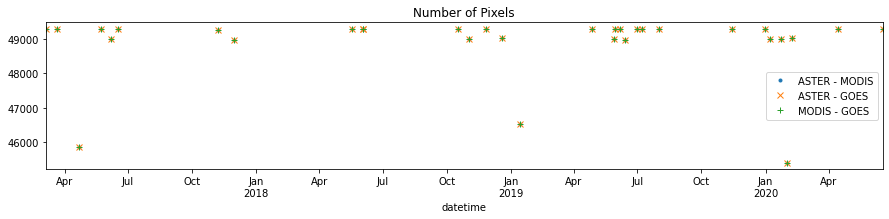

In [36]:
fig, ax = plt.subplots(1,1,figsize=(15,3))

df.ast_mod_n.plot(linestyle='none', marker='.', ax=ax , label='ASTER - MODIS')
df.ast_goes_n.plot(linestyle='none', marker='x', ax=ax,  label='ASTER - GOES')
df.mod_goes_n.plot(linestyle='none', marker='+', ax=ax,  label='MODIS - GOES')
plt.legend()
ax.set_title('Number of Pixels')
format_date_ax(ax)


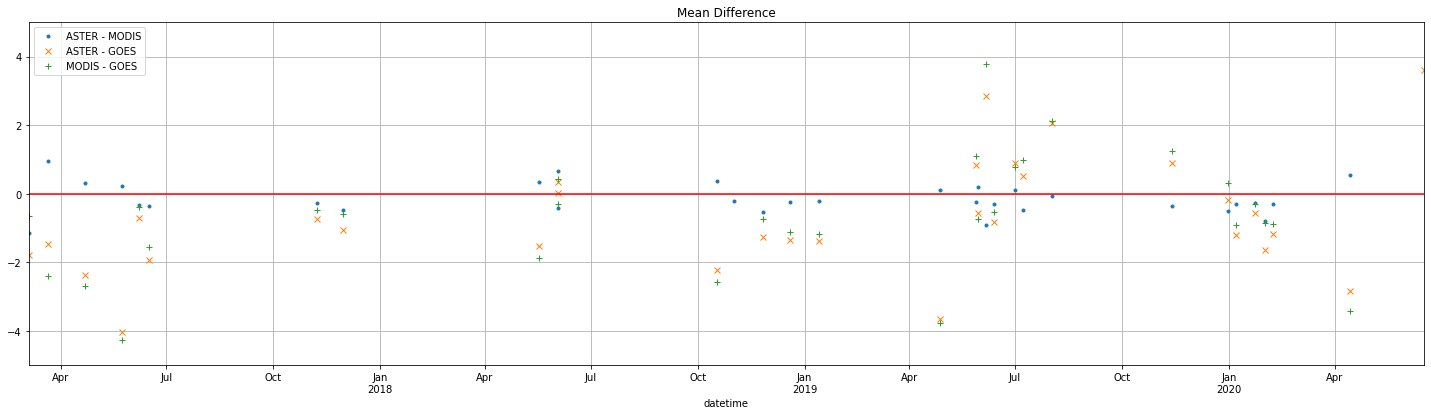

In [46]:
fig, ax = plt.subplots(1,1,figsize=(25,7))

df.ast_mod_mean_diff.plot(linestyle='none', marker='.', ax=ax , label='ASTER - MODIS')
df.ast_goes_mean_diff.plot(linestyle='none', marker='x', ax=ax,  label='ASTER - GOES')
df.mod_goes_mean_diff.plot(linestyle='none', marker='+', ax=ax,  label='MODIS - GOES')
plt.legend()
ax.set_title('Mean Difference')

ax.set_ylim(-5,5)
ax.axhline(0,c='r')
plt.grid()
format_date_ax(ax)


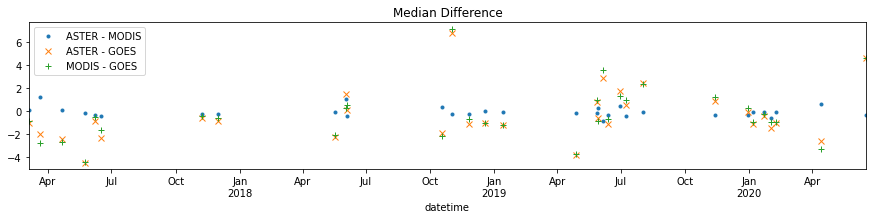

In [38]:
fig, ax = plt.subplots(1,1,figsize=(15,3))

df.ast_mod_median_diff.plot(linestyle='none', marker='.', ax=ax, label='ASTER - MODIS')
df.ast_goes_median_diff.plot(linestyle='none', marker='x', ax=ax, label='ASTER - GOES')
df.mod_goes_median_diff.plot(linestyle='none', marker='+', ax=ax, label='MODIS - GOES')
plt.legend()
ax.set_title('Median Difference')

format_date_ax(ax)

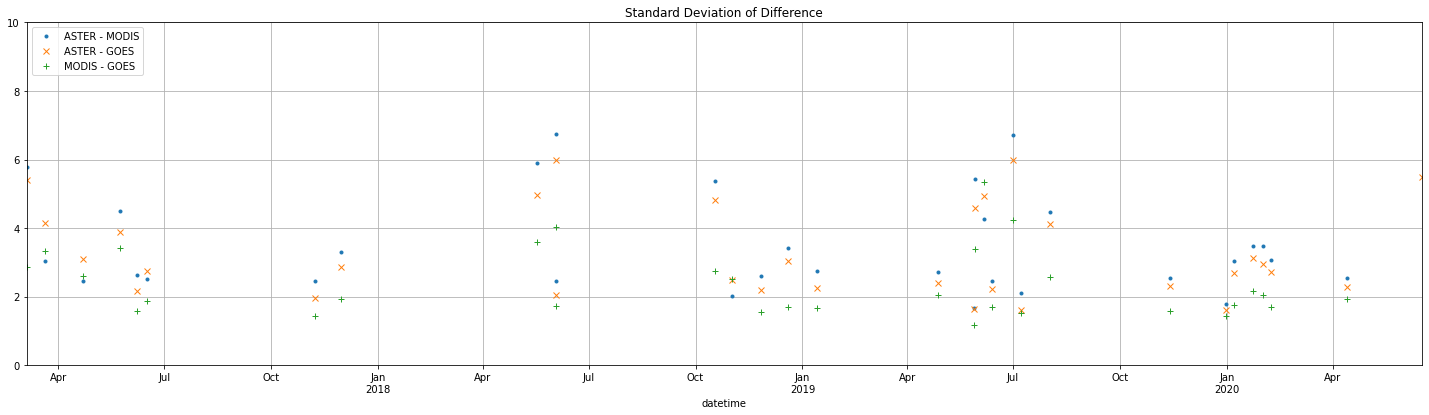

In [49]:
fig, ax = plt.subplots(1,1,figsize=(25,7))

df.ast_mod_std_diff.plot(linestyle='none', marker='.', ax=ax, label='ASTER - MODIS')
df.ast_goes_std_diff.plot(linestyle='none', marker='x', ax=ax, label='ASTER - GOES')
df.mod_goes_std_diff.plot(linestyle='none', marker='+', ax=ax, label='MODIS - GOES')
plt.legend()
ax.set_title('Standard Deviation of Difference')

ax.set_ylim(0,10)

plt.grid()

format_date_ax(ax)

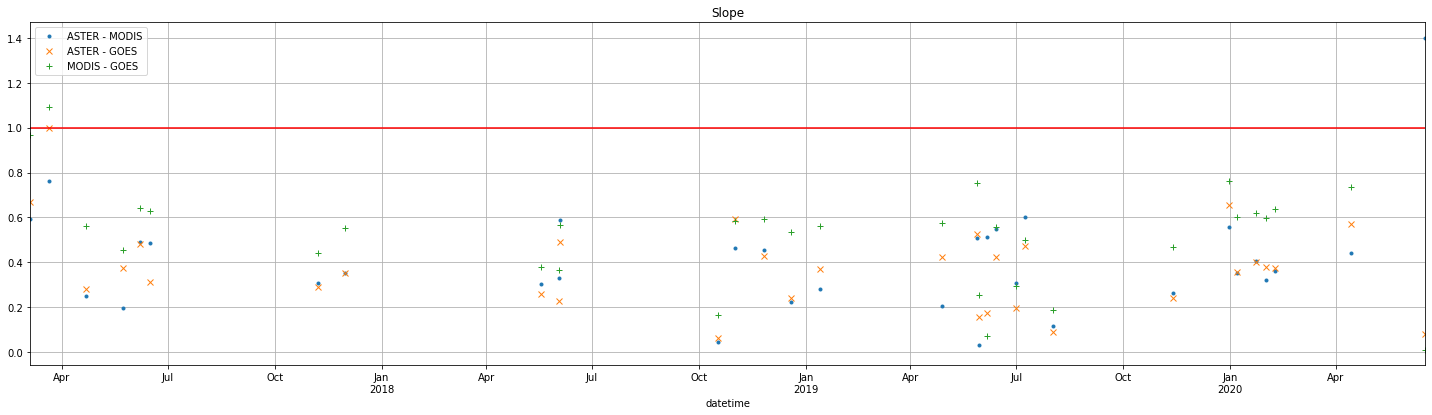

In [157]:
fig, ax = plt.subplots(1,1,figsize=(25,7))

df.ast_mod_slope.plot(linestyle='none', marker='.', ax=ax, label='ASTER - MODIS')
df.ast_goes_slope.plot(linestyle='none', marker='x', ax=ax, label='ASTER - GOES')
df.mod_goes_slope.plot(linestyle='none', marker='+', ax=ax, label='MODIS - GOES')
plt.legend()
ax.set_title('Slope')


#ax.set_ylim(0,1.)
ax.axhline(1,c='r')

plt.grid()

format_date_ax(ax)

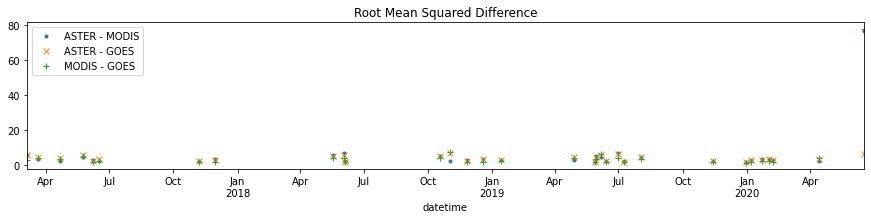

In [40]:
fig, ax = plt.subplots(1,1,figsize=(15,3))

df.ast_mod_rms_diff.plot(linestyle='none', marker='.', ax=ax, label='ASTER - MODIS')
df.ast_goes_rms_diff.plot(linestyle='none', marker='x', ax=ax, label='ASTER - GOES')
df.mod_goes_rms_diff.plot(linestyle='none', marker='+', ax=ax, label='MODIS - GOES')
plt.legend()
ax.set_title('Root Mean Squared Difference')

#ax.set_ylim(0,20)

format_date_ax(ax)

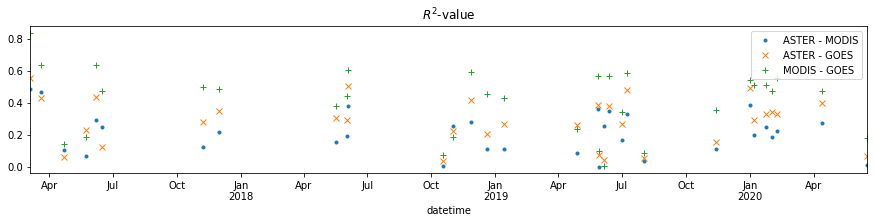

In [41]:
fig, ax = plt.subplots(1,1,figsize=(15,3))

df.ast_mod_r2_value.plot(linestyle='none', marker='.', ax=ax, label='ASTER - MODIS')
df.ast_goes_r2_value.plot(linestyle='none', marker='x', ax=ax, label='ASTER - GOES')
df.mod_goes_r2_value.plot(linestyle='none', marker='+', ax=ax, label='MODIS - GOES')
plt.legend()
ax.set_title('$R^2$-value')

#ax.set_ylim(0,1)

format_date_ax(ax)

In [42]:
df.keys()

Index(['Unnamed: 0', 'bounding_geometry', 'aster_filepath', 'aster_datetime',
       'modis_filepath', 'modis_datetime', 'goes_filepath', 'goes_datetime',
       'ast_mod_n', 'ast_mod_mean_diff', 'ast_mod_median_diff',
       'ast_mod_mean_squared_diff', 'ast_mod_rms_diff', 'ast_mod_std_diff',
       'ast_mod_slope', 'ast_mod_intercept', 'ast_mod_r_value',
       'ast_mod_p_value', 'ast_mod_std_err', 'ast_goes_n',
       'ast_goes_mean_diff', 'ast_goes_median_diff',
       'ast_goes_mean_squared_diff', 'ast_goes_rms_diff', 'ast_goes_std_diff',
       'ast_goes_slope', 'ast_goes_intercept', 'ast_goes_r_value',
       'ast_goes_p_value', 'ast_goes_std_err', 'mod_goes_n',
       'mod_goes_mean_diff', 'mod_goes_median_diff',
       'mod_goes_mean_squared_diff', 'mod_goes_rms_diff', 'mod_goes_std_diff',
       'mod_goes_slope', 'mod_goes_intercept', 'mod_goes_r_value',
       'mod_goes_p_value', 'mod_goes_std_err', 'ast_mod_r2_value',
       'ast_goes_r2_value', 'mod_goes_r2_value'],
      

In [50]:
import numpy as np

0.2914252121615027
0.2914252121615027
0.39980191276009047
0.41787491447813224
0.4723738432938651


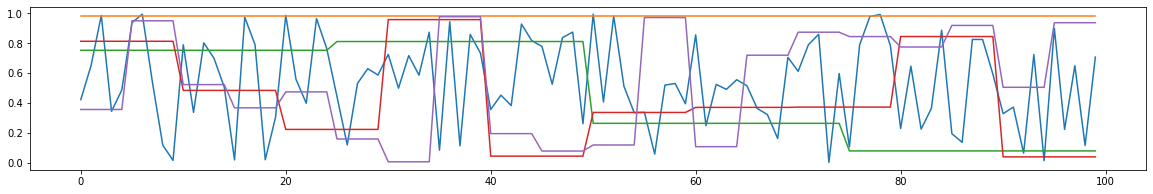

In [153]:
truth = np.random.rand(100)
#print(truth)

obs0 = np.ones(100)*np.random.rand(1)
diff0 = truth - obs0


obs1 = np.array([np.ones(25)*np.random.rand(1), np.ones(25)*np.random.rand(1), np.ones(25)*np.random.rand(1), np.ones(25)*np.random.rand(1)]).ravel()
diff1 = truth - obs1


obs2 = np.array([np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1), \
                np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1), np.ones(10)*np.random.rand(1)]).ravel()
diff2 = truth - obs2

obs3 = np.array([np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), \
                np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), \
                 np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), \
                 np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1), np.ones(5)*np.random.rand(1)]).ravel()
diff3 = truth - obs3

plt.figure(figsize=(20,3))
plt.plot(truth)
plt.plot(obs0)
plt.plot(obs1)
plt.plot(obs2)
plt.plot(obs3)

print(np.std(truth))
print(np.std(diff0))
print(np.std(diff1))
print(np.std(diff2))
print(np.std(diff3))